In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') 
!./configure --prefix=/usr
!make
!make install

os.chdir('../')
!pip install TA-Lib

--2021-12-02 10:22:12--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-02 10:22:13--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-02 10:22:13--  http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving newco

In [3]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math

   
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump


import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.layers import GRU, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, ELU, ReLU
from tensorflow.keras import Sequential, regularizers
from tensorflow.python.client import device_lib

### Importing all the required library ###
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import math
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from numpy import array
from tensorflow.keras.models import Sequential,save_model,load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense ,LeakyReLU
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv1D, Conv2D ,Conv3D ,Conv2DTranspose,Conv1DTranspose
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

# import talib as ta
import csv
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


id = '1vhAqz8lvWfxH0dcy5QTpKm5qawb6SW5K'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_USD_M30.csv') 
 
id = '13_lAB-ioAmtmWabgm5hHBXYY5ssw2QKs'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_USD_M15.csv')
 
id = '1TPA4Mtbjws9yTJdpV1kK5fDA0Vxk_2eo'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_USD_H1.csv')



# Dataset fill

## 15M

In [4]:
dataset_M15 = pd.read_csv('AUD_USD_M15.csv', parse_dates=[0], index_col=0)
dataset_M15.index

DatetimeIndex(['2005-01-02 18:45:00+00:00', '2005-01-02 19:15:00+00:00',
               '2005-01-02 19:45:00+00:00', '2005-01-02 20:00:00+00:00',
               '2005-01-02 20:15:00+00:00', '2005-01-02 20:30:00+00:00',
               '2005-01-02 20:45:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 21:15:00+00:00', '2005-01-02 21:30:00+00:00',
               ...
               '2021-07-30 18:30:00+00:00', '2021-07-30 18:45:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 19:15:00+00:00',
               '2021-07-30 19:30:00+00:00', '2021-07-30 19:45:00+00:00',
               '2021-07-30 20:00:00+00:00', '2021-07-30 20:15:00+00:00',
               '2021-07-30 20:30:00+00:00', '2021-07-30 20:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=417944, freq=None)

In [5]:
t_index_M15 = pd.date_range('2005-01-02 18:45:00+00:00',  '2021-07-30 20:45:00+00:00', freq='15T')  
dataset_M15 = dataset_M15.reindex(t_index_M15)

In [6]:
dataset_M15 = dataset_M15.reset_index(level=0)
dataset_M15 = dataset_M15.rename(columns={'index':'datetime'})

In [7]:
ful_data0_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 0]  
ful_data1_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 1]
ful_data2_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 2]
ful_data3_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 3]
ful_data4_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 4]
ful_data4_M15 = ful_data4_M15[ful_data4_M15['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 6]
ful_data6_M15 = ful_data6_M15[ful_data6_M15['datetime'].dt.hour.isin(np.arange(21, 24))]

In [8]:
ful_data_M15 = pd.concat([ful_data0_M15, ful_data1_M15, ful_data2_M15, ful_data3_M15, ful_data4_M15, ful_data6_M15])
ful_data_M15 = ful_data_M15.sort_values(by = 'datetime')

In [9]:
ful_data_M15 = ful_data_M15.reset_index()
ful_data_M15 = ful_data_M15.drop(labels='index',axis=1)

In [10]:
ful_data_M15 = ful_data_M15.pad()  
ful_data_M15

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.78110,0.78150,0.78110,0.78140
1,2005-01-02 21:15:00+00:00,0.78110,0.78110,0.78070,0.78090
2,2005-01-02 21:30:00+00:00,0.78080,0.78100,0.78070,0.78100
3,2005-01-02 21:45:00+00:00,0.78090,0.78090,0.78060,0.78060
4,2005-01-02 22:00:00+00:00,0.78070,0.78100,0.78070,0.78090
...,...,...,...,...,...
418651,2021-07-30 19:45:00+00:00,0.73381,0.73402,0.73331,0.73378
418652,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73402
418653,2021-07-30 20:15:00+00:00,0.73398,0.73404,0.73384,0.73398
418654,2021-07-30 20:30:00+00:00,0.73394,0.73462,0.73387,0.73462


In [11]:
np.any(ful_data_M15.isnull())

False

## 30M

In [12]:
dataset_M30 = pd.read_csv('AUD_USD_M30.csv', parse_dates=[0], index_col=0)
dataset_M30.index

DatetimeIndex(['2005-01-02 18:30:00+00:00', '2005-01-02 19:00:00+00:00',
               '2005-01-02 19:30:00+00:00', '2005-01-02 20:00:00+00:00',
               '2005-01-02 20:30:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 21:30:00+00:00', '2005-01-02 22:00:00+00:00',
               '2005-01-02 22:30:00+00:00', '2005-01-02 23:00:00+00:00',
               ...
               '2021-07-30 16:00:00+00:00', '2021-07-30 16:30:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-30 17:30:00+00:00',
               '2021-07-30 18:00:00+00:00', '2021-07-30 18:30:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 19:30:00+00:00',
               '2021-07-30 20:00:00+00:00', '2021-07-30 20:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=209850, freq=None)

In [13]:
t_index_M30 = pd.date_range('2005-01-02 18:30:00+00:00',  '2021-07-30 20:30:00+00:00', freq='30T')
dataset_M30 = dataset_M30.reindex(t_index_M30)

In [14]:
dataset_M30 = dataset_M30.reset_index(level=0)
dataset_M30 = dataset_M30.rename(columns={'index':'datetime'})

In [15]:
ful_data0_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 0]  
ful_data1_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 1]
ful_data2_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 2]
ful_data3_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 3]
ful_data4_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 4]
ful_data4_M30 = ful_data4_M30[ful_data4_M30['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 6]
ful_data6_M30 = ful_data6_M30[ful_data6_M30['datetime'].dt.hour.isin(np.arange(21, 24))]

In [16]:
ful_data_M30 = pd.concat([ful_data0_M30, ful_data1_M30, ful_data2_M30, ful_data3_M30, ful_data4_M30, ful_data6_M30])
ful_data_M30 = ful_data_M30.sort_values(by = 'datetime')

In [17]:
ful_data_M30 = ful_data_M30.reset_index()
ful_data_M30 = ful_data_M30.drop(labels='index',axis=1)

In [18]:
ful_data_M30 = ful_data_M30.pad()
ful_data_M30

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.78110,0.78150,0.78070,0.78090
1,2005-01-02 21:30:00+00:00,0.78080,0.78100,0.78060,0.78060
2,2005-01-02 22:00:00+00:00,0.78070,0.78130,0.78070,0.78130
3,2005-01-02 22:30:00+00:00,0.78160,0.78240,0.78140,0.78240
4,2005-01-02 23:00:00+00:00,0.78250,0.78390,0.78220,0.78370
...,...,...,...,...,...
209323,2021-07-30 18:30:00+00:00,0.73328,0.73363,0.73310,0.73348
209324,2021-07-30 19:00:00+00:00,0.73352,0.73390,0.73352,0.73386
209325,2021-07-30 19:30:00+00:00,0.73383,0.73402,0.73331,0.73378
209326,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73398


## 1H

In [19]:
dataset_H1 = pd.read_csv('AUD_USD_H1.csv', parse_dates=[0], index_col=0)
dataset_H1.index

DatetimeIndex(['2005-01-02 18:00:00+00:00', '2005-01-02 19:00:00+00:00',
               '2005-01-02 20:00:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 22:00:00+00:00', '2005-01-02 23:00:00+00:00',
               '2005-01-03 00:00:00+00:00', '2005-01-03 01:00:00+00:00',
               '2005-01-03 02:00:00+00:00', '2005-01-03 03:00:00+00:00',
               ...
               '2021-07-30 11:00:00+00:00', '2021-07-30 12:00:00+00:00',
               '2021-07-30 13:00:00+00:00', '2021-07-30 14:00:00+00:00',
               '2021-07-30 15:00:00+00:00', '2021-07-30 16:00:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-30 18:00:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 20:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=105627, freq=None)

In [20]:
t_index_H1 = pd.date_range('2005-01-02 18:00:00+00:00',  '2021-07-30 20:00:00+00:00', freq='1H')
dataset_H1 = dataset_H1.reindex(t_index_H1)

In [21]:
dataset_H1 = dataset_H1.reset_index(level=0)
dataset_H1 = dataset_H1.rename(columns={'index':'datetime'})

In [22]:
ful_data0_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 0]  
ful_data1_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 1]
ful_data2_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 2]
ful_data3_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 3]
ful_data4_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 4]
ful_data4_H1 = ful_data4_H1[ful_data4_H1['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 6]
ful_data6_H1 = ful_data6_H1[ful_data6_H1['datetime'].dt.hour.isin(np.arange(21, 24))]

In [23]:
ful_data_H1 = pd.concat([ful_data0_H1, ful_data1_H1, ful_data2_H1, ful_data3_H1, ful_data4_H1, ful_data6_H1])
ful_data_H1 = ful_data_H1.sort_values(by = 'datetime')

In [24]:
ful_data_H1 = ful_data_H1.reset_index()
ful_data_H1 = ful_data_H1.drop(labels='index',axis=1)

In [25]:
ful_data_H1 = ful_data_H1.pad()
ful_data_H1

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.78110,0.78150,0.78060,0.78060
1,2005-01-02 22:00:00+00:00,0.78070,0.78240,0.78070,0.78240
2,2005-01-02 23:00:00+00:00,0.78250,0.78390,0.78220,0.78320
3,2005-01-03 00:00:00+00:00,0.78330,0.78350,0.78130,0.78180
4,2005-01-03 01:00:00+00:00,0.78180,0.78275,0.78145,0.78155
...,...,...,...,...,...
104659,2021-07-30 16:00:00+00:00,0.73506,0.73510,0.73425,0.73434
104660,2021-07-30 17:00:00+00:00,0.73437,0.73440,0.73361,0.73394
104661,2021-07-30 18:00:00+00:00,0.73391,0.73402,0.73310,0.73348
104662,2021-07-30 19:00:00+00:00,0.73352,0.73402,0.73331,0.73378


# TA indicator

In [26]:
import talib as ta


def get_technical_indicators(data, timeperiod = 10):
    data['wma']=ta.WMA(data.close,timeperiod=timeperiod)
    data['ema']=ta.EMA(data.close,timeperiod=timeperiod)
    data['midpoint']=ta.MIDPOINT(data.close,timeperiod=timeperiod)
    data['sma']=ta.SMA(data.close,timeperiod=timeperiod)
    data['tema']=ta.TEMA(data.close,timeperiod=timeperiod)
    data['ma']=ta.MA(data.close,timeperiod=timeperiod)
    data['kama']=ta.KAMA(data.close,timeperiod=timeperiod)
    data['rocr']=ta.ROCR(data.close,timeperiod=timeperiod)
    data['DEMA']=ta.DEMA(data.close,timeperiod=timeperiod)
    data['TRIMA']=ta.TRIMA(data.close,timeperiod=timeperiod)
    data['LINEARREG']=ta.LINEARREG(data.close,timeperiod=timeperiod)
    data['TSF']=ta.TSF(data.close,timeperiod=timeperiod)


    return data

#AUD_USD_H1 data scale

In [27]:
df = ful_data_H1

In [28]:
df = df.tail(20000).reset_index(drop=True)


In [29]:
data = get_technical_indicators(df)
data = data.iloc[30:,:].reset_index(drop=True)
data

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75672,0.75572,0.75666,0.755092,0.755263,0.754790,0.754806,0.756084,0.754806,0.755056,1.002385,0.755433,0.754356,0.755663,0.755853
1,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75590,0.75652,0.755403,0.755492,0.754790,0.754938,0.756478,0.754938,0.755106,1.001748,0.755817,0.754607,0.756334,0.756644
2,2018-06-01 18:00:00+00:00,0.75658,0.75728,0.75632,0.75695,0.755769,0.755757,0.754935,0.755171,0.756910,0.755171,0.755250,1.003088,0.756240,0.755029,0.756965,0.757364
3,2018-06-01 19:00:00+00:00,0.75688,0.75708,0.75628,0.75684,0.756073,0.755954,0.754935,0.755421,0.757118,0.755421,0.755394,1.003314,0.756510,0.755496,0.757376,0.757810
4,2018-06-01 20:00:00+00:00,0.75678,0.75724,0.75672,0.75688,0.756338,0.756122,0.754935,0.755649,0.757243,0.755649,0.755517,1.003021,0.756715,0.755927,0.757715,0.758175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,2021-07-30 16:00:00+00:00,0.73506,0.73510,0.73425,0.73434,0.736085,0.736432,0.737185,0.736950,0.734523,0.736950,0.737459,0.995149,0.735099,0.736893,0.734354,0.733777
19966,2021-07-30 17:00:00+00:00,0.73437,0.73440,0.73361,0.73394,0.735537,0.735979,0.736985,0.736431,0.733941,0.736431,0.736771,0.992978,0.734517,0.736362,0.733750,0.733155
19967,2021-07-30 18:00:00+00:00,0.73391,0.73402,0.73310,0.73348,0.735001,0.735525,0.736000,0.735776,0.733399,0.735776,0.735708,0.991149,0.733957,0.735802,0.733451,0.732934
19968,2021-07-30 19:00:00+00:00,0.73352,0.73402,0.73331,0.73378,0.734638,0.735207,0.735305,0.735302,0.733230,0.735302,0.735234,0.993582,0.733665,0.735296,0.733310,0.732867


In [30]:
data_H1_ali = data

In [31]:
data_H1_ali

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75672,0.75572,0.75666,0.755092,0.755263,0.754790,0.754806,0.756084,0.754806,0.755056,1.002385,0.755433,0.754356,0.755663,0.755853
1,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75590,0.75652,0.755403,0.755492,0.754790,0.754938,0.756478,0.754938,0.755106,1.001748,0.755817,0.754607,0.756334,0.756644
2,2018-06-01 18:00:00+00:00,0.75658,0.75728,0.75632,0.75695,0.755769,0.755757,0.754935,0.755171,0.756910,0.755171,0.755250,1.003088,0.756240,0.755029,0.756965,0.757364
3,2018-06-01 19:00:00+00:00,0.75688,0.75708,0.75628,0.75684,0.756073,0.755954,0.754935,0.755421,0.757118,0.755421,0.755394,1.003314,0.756510,0.755496,0.757376,0.757810
4,2018-06-01 20:00:00+00:00,0.75678,0.75724,0.75672,0.75688,0.756338,0.756122,0.754935,0.755649,0.757243,0.755649,0.755517,1.003021,0.756715,0.755927,0.757715,0.758175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,2021-07-30 16:00:00+00:00,0.73506,0.73510,0.73425,0.73434,0.736085,0.736432,0.737185,0.736950,0.734523,0.736950,0.737459,0.995149,0.735099,0.736893,0.734354,0.733777
19966,2021-07-30 17:00:00+00:00,0.73437,0.73440,0.73361,0.73394,0.735537,0.735979,0.736985,0.736431,0.733941,0.736431,0.736771,0.992978,0.734517,0.736362,0.733750,0.733155
19967,2021-07-30 18:00:00+00:00,0.73391,0.73402,0.73310,0.73348,0.735001,0.735525,0.736000,0.735776,0.733399,0.735776,0.735708,0.991149,0.733957,0.735802,0.733451,0.732934
19968,2021-07-30 19:00:00+00:00,0.73352,0.73402,0.73331,0.73378,0.734638,0.735207,0.735305,0.735302,0.733230,0.735302,0.735234,0.993582,0.733665,0.735296,0.733310,0.732867


## y scale

In [32]:
def y_size_scale(column, num_point,pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1):
            
        y_holder = []
        #Taking from i to i+num_point as real data
        for j in range(i,i + pred_point):
            y_holder.append(column[j])
        Y.append(y_holder)

        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    

    return array(X), array(Y)

In [33]:
num_point = 5
pred_point = 1

fake_y, real_y = y_size_scale(data_H1_ali['close'],num_point, pred_point)
max_y_rows = fake_y.max(axis=1)

# fake_scaled_unshape = fake / max_of_fake_rows[:, np.newaxis]
real_scaled_unshape = real_y/max_y_rows[:, np.newaxis]


# real_scaled = real_scaled_unshape.reshape((real_scaled_unshape.shape[0],1,real_scaled_unshape.shape[1]))
# fake_scaled = fake_scaled_unshape.reshape((fake_scaled_unshape.shape[0],1,fake_scaled_unshape.shape[1]))

In [34]:
print(real_scaled_unshape.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(19965, 1)


## Feature

In [35]:
def feature_scale(column, num_point, pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1):
        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    
    return array(X)

In [36]:
num_point = 5
pred_point = 1
feature_columns = [column for column in data_H1_ali]
feature_tem = np.zeros((real_scaled_unshape.shape[0], data_H1_ali.shape[1] - 1, num_point))
feature_tem.shape

(19965, 16, 5)

In [37]:
for i in range(data_H1_ali.shape[1] - 1):
  
  feature_fake = feature_scale(data_H1_ali[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows = feature_fake.max(axis=1)
  fake_scaled_unshape = feature_fake / max_feature_rows[:, np.newaxis]
  feature_tem[:,i,:] = fake_scaled_unshape


In [38]:
feature_tem_top4 = feature_tem[:,:4,:]

In [39]:
np.savez('AUD_USD_H1', AUD_USD_H1_feature = feature_tem, AUD_USD_H1_y = real_scaled_unshape)
np.savez('AUD_USD_H1_top4', AUD_USD_H1_feature_top4 = feature_tem_top4)

In [40]:
data1 = np.load('AUD_USD_H1.npz')
data2 = np.load('AUD_USD_H1_top4.npz')

In [41]:
data1['AUD_USD_H1_feature'].shape

(19965, 16, 5)

In [42]:
data2['AUD_USD_H1_feature_top4'].shape

(19965, 4, 5)

In [43]:
data1['AUD_USD_H1_y'].shape

(19965, 1)

# AUD_USD_30M data scale

In [44]:
df_30m = ful_data_M30

In [45]:
df_30m = df_30m.tail(40000).reset_index(drop=True)

In [46]:
data_30m = get_technical_indicators(df_30m)
data_30m = data_30m.iloc[60:,:].reset_index(drop=True)
data_30m

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75667,0.75580,0.75620,0.755391,0.755293,0.75462,0.754786,0.756404,0.754786,0.754898,1.002944,0.755886,0.754750,0.756600,0.757003
1,2018-06-01 16:30:00+00:00,0.75624,0.75672,0.75572,0.75666,0.755731,0.755542,0.75479,0.755122,0.756732,0.755122,0.755230,1.004460,0.756230,0.755186,0.756950,0.757356
2,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75649,0.75700,0.756073,0.755807,0.75496,0.755444,0.757072,0.755444,0.755553,1.004272,0.756587,0.755606,0.757330,0.757749
3,2018-06-01 17:30:00+00:00,0.75694,0.75698,0.75590,0.75652,0.756268,0.755936,0.75556,0.755804,0.757049,0.755804,0.755797,1.004781,0.756681,0.755962,0.757197,0.757507
4,2018-06-01 18:00:00+00:00,0.75658,0.75728,0.75632,0.75728,0.756537,0.756181,0.75570,0.756112,0.757343,0.756112,0.756142,1.004084,0.756990,0.756239,0.757386,0.757669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39935,2021-07-30 18:30:00+00:00,0.73328,0.73363,0.73310,0.73348,0.734014,0.734448,0.73438,0.734368,0.733183,0.734368,0.734685,0.995143,0.733296,0.734373,0.733305,0.733069
39936,2021-07-30 19:00:00+00:00,0.73352,0.73390,0.73352,0.73386,0.733921,0.734341,0.73417,0.734202,0.733318,0.734202,0.734602,0.997743,0.733311,0.734157,0.733360,0.733173
39937,2021-07-30 19:30:00+00:00,0.73383,0.73402,0.73331,0.73378,0.733845,0.734239,0.73417,0.734070,0.733404,0.734070,0.734535,0.998204,0.733313,0.733979,0.733394,0.733244
39938,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73398,0.733828,0.734192,0.73417,0.734000,0.733576,0.734000,0.734515,0.999047,0.733396,0.733843,0.733485,0.733371


In [47]:
data_30m_ali = data_30m

In [48]:
data_30m_ali

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75667,0.75580,0.75620,0.755391,0.755293,0.75462,0.754786,0.756404,0.754786,0.754898,1.002944,0.755886,0.754750,0.756600,0.757003
1,2018-06-01 16:30:00+00:00,0.75624,0.75672,0.75572,0.75666,0.755731,0.755542,0.75479,0.755122,0.756732,0.755122,0.755230,1.004460,0.756230,0.755186,0.756950,0.757356
2,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75649,0.75700,0.756073,0.755807,0.75496,0.755444,0.757072,0.755444,0.755553,1.004272,0.756587,0.755606,0.757330,0.757749
3,2018-06-01 17:30:00+00:00,0.75694,0.75698,0.75590,0.75652,0.756268,0.755936,0.75556,0.755804,0.757049,0.755804,0.755797,1.004781,0.756681,0.755962,0.757197,0.757507
4,2018-06-01 18:00:00+00:00,0.75658,0.75728,0.75632,0.75728,0.756537,0.756181,0.75570,0.756112,0.757343,0.756112,0.756142,1.004084,0.756990,0.756239,0.757386,0.757669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39935,2021-07-30 18:30:00+00:00,0.73328,0.73363,0.73310,0.73348,0.734014,0.734448,0.73438,0.734368,0.733183,0.734368,0.734685,0.995143,0.733296,0.734373,0.733305,0.733069
39936,2021-07-30 19:00:00+00:00,0.73352,0.73390,0.73352,0.73386,0.733921,0.734341,0.73417,0.734202,0.733318,0.734202,0.734602,0.997743,0.733311,0.734157,0.733360,0.733173
39937,2021-07-30 19:30:00+00:00,0.73383,0.73402,0.73331,0.73378,0.733845,0.734239,0.73417,0.734070,0.733404,0.734070,0.734535,0.998204,0.733313,0.733979,0.733394,0.733244
39938,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73398,0.733828,0.734192,0.73417,0.734000,0.733576,0.734000,0.734515,0.999047,0.733396,0.733843,0.733485,0.733371


## y_scale

In [49]:
def y_size_scale_30m(column, num_point,pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1, 2):
            
        y_holder = []
        #Taking from i to i+num_point as real data
        for j in range(i,i + pred_point):
            y_holder.append(column[j])
        Y.append(y_holder)

        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    

    return array(X), array(Y)

In [50]:
num_point = 9
pred_point = 2

fake_y_30m, real_y_30m = y_size_scale_30m(data_30m_ali['close'], num_point, pred_point)
max_y_rows_30m = fake_y_30m.max(axis=1)


real_scaled_unshape_30m = real_y_30m/max_y_rows_30m[:, np.newaxis]



In [51]:
print(real_scaled_unshape_30m.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(19965, 2)


## feature_scale

In [52]:
def feature_scale_30m(column, num_point, pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1, 2):
        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    
    return array(X)

In [53]:
num_point = 9
pred_point = 2
feature_columns = [column for column in data_30m_ali]
feature_tem_30m = np.zeros((real_scaled_unshape_30m.shape[0], data_30m_ali.shape[1] - 1, num_point))
feature_tem_30m.shape

(19965, 16, 9)

In [54]:
for i in range(data_30m.shape[1] - 1):
  
  feature_fake_30m = feature_scale_30m(data_30m_ali[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows_30m = feature_fake_30m.max(axis=1)
  fake_scaled_unshape_30m = feature_fake_30m / max_feature_rows_30m[:, np.newaxis]
  feature_tem_30m[:,i,:] = fake_scaled_unshape_30m

In [55]:
feature_tem_30m_top4 = feature_tem_30m[:,:4,:]

In [56]:
np.savez('AUD_USD_m30', AUD_USD_m30_feature = feature_tem_30m, AUD_USD_30m_y = real_scaled_unshape_30m)
np.savez('AUD_USD_m30_top4', AUD_USD_m30_feature_top4 = feature_tem_30m_top4)

In [57]:
data3 = np.load('AUD_USD_m30.npz')
data4 = np.load('AUD_USD_m30_top4.npz')

In [58]:
data3['AUD_USD_m30_feature'].shape

(19965, 16, 9)

In [59]:
data4['AUD_USD_m30_feature_top4'].shape

(19965, 4, 9)

In [60]:
data3['AUD_USD_30m_y'].shape

(19965, 2)

# AUD_USD_15M data scale

In [61]:
df_15m = ful_data_M15

In [62]:
df_15m = df_15m.tail(80000).reset_index(drop=True)

In [63]:
data_15m = get_technical_indicators(df_15m)
data_15m = data_15m.iloc[120:,:].reset_index(drop=True)
data_15m

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75667,0.75608,0.75608,0.755821,0.755539,0.755200,0.755407,0.756509,0.755407,0.755294,1.002227,0.756247,0.755536,0.756650,0.756927
1,2018-06-01 16:15:00+00:00,0.75604,0.75624,0.75580,0.75620,0.755966,0.755659,0.755200,0.755615,0.756527,0.755615,0.755424,1.002758,0.756337,0.755790,0.756667,0.756901
2,2018-06-01 16:30:00+00:00,0.75624,0.75630,0.75587,0.75589,0.756016,0.755701,0.755310,0.755796,0.756373,0.755796,0.755472,1.002400,0.756290,0.755967,0.756455,0.756601
3,2018-06-01 16:45:00+00:00,0.75589,0.75672,0.75572,0.75666,0.756173,0.755876,0.755480,0.755982,0.756597,0.755982,0.755597,1.002464,0.756500,0.756092,0.756554,0.756681
4,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75665,0.75668,0.756300,0.756022,0.756285,0.756220,0.756736,0.756220,0.755807,1.003155,0.756652,0.756187,0.756459,0.756512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:45:00+00:00,0.73381,0.73402,0.73331,0.73378,0.733695,0.733841,0.733695,0.733715,0.733733,0.733715,0.733995,0.999918,0.733543,0.733618,0.733655,0.733642
79876,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73402,0.733751,0.733873,0.733630,0.733702,0.733878,0.733702,0.733995,0.999823,0.733656,0.733645,0.733848,0.733880
79877,2021-07-30 20:15:00+00:00,0.73398,0.73404,0.73384,0.73398,0.733801,0.733893,0.733630,0.733706,0.733958,0.733706,0.733995,1.000055,0.733731,0.733700,0.733991,0.734055
79878,2021-07-30 20:30:00+00:00,0.73394,0.73462,0.73387,0.73462,0.733967,0.734025,0.733930,0.733790,0.734299,0.733790,0.734051,1.001145,0.734001,0.733785,0.734322,0.734440


## y_scale

In [64]:
def y_size_scale_15m(column, num_point,pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1, 4):
            
        y_holder = []
        #Taking from i to i+num_point as real data
        for j in range(i,i + pred_point):
            y_holder.append(column[j])
        Y.append(y_holder)

        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    

    return array(X), array(Y)

In [65]:
num_point = 17
pred_point = 4

fake_y_15m, real_y_15m = y_size_scale_15m(data_15m['close'], num_point, pred_point)
max_y_rows_15m = fake_y_15m.max(axis=1)


real_scaled_unshape_15m = real_y_15m/max_y_rows_15m[:, np.newaxis]


In [66]:
print(real_scaled_unshape_15m.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(19965, 4)


## feature

In [67]:
def feature_scale_15m(column, num_point, pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1, 4):
        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    
    return array(X)

In [68]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_15m]
feature_tem_15m = np.zeros((real_scaled_unshape_15m.shape[0],data_15m.shape[1] - 1,num_point))
feature_tem_15m.shape

(19965, 16, 17)

In [69]:
for i in range(data_15m.shape[1] - 1):
  
  feature_fake_15m = feature_scale_15m(data_15m[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows_15m = feature_fake_15m.max(axis=1)
  fake_scaled_unshape_15m = feature_fake_15m / max_feature_rows_15m[:, np.newaxis]
  feature_tem_15m[:,i,:] = fake_scaled_unshape_15m

In [70]:
feature_tem_15m_top4 = feature_tem_15m[:,:4,:]

In [71]:
np.savez('AUD_USD_m15', AUD_USD_m15_feature = feature_tem_15m, AUD_USD_15m_y = real_scaled_unshape_15m)
np.savez('AUD_USD_m15_top4', AUD_USD_m15_feature_top4 = feature_tem_15m_top4)

In [72]:
data5 = np.load('AUD_USD_m15.npz')
data6 = np.load('AUD_USD_m15_top4.npz')

In [73]:
data5['AUD_USD_m15_feature'].shape

(19965, 16, 17)

In [74]:
data6['AUD_USD_m15_feature_top4'].shape

(19965, 4, 17)

# Split data

## AUD_USD_H1 split data

In [75]:
def split_train_test(data):
    train_size = round(data.shape[0] * 0.7)
    valid_size = round(data.shape[0] * 0.15)
    data_train = data[0:train_size]
    data_valid = data[train_size: train_size + valid_size]
    data_test = data[train_size + valid_size:]
    return data_train, data_valid, data_test

In [76]:
data_H1 = np.load('AUD_USD_H1.npz')
data_H1_top4 = np.load('AUD_USD_H1_top4.npz')

In [77]:
H1_X = data_H1['AUD_USD_H1_feature']
H1_X_top4 = data_H1_top4['AUD_USD_H1_feature_top4']

In [78]:
H1_y = data_H1['AUD_USD_H1_y']

In [79]:
train_H1_X, valid_H1_X, test_H1_X = split_train_test(H1_X)
train_H1_X_top4, valid_H1_X_top4, test_H1_X_top4 = split_train_test(H1_X_top4)
train_H1_y, valid_H1_y, test_H1_y = split_train_test(H1_y)

In [80]:
print(train_H1_X.shape)
print(valid_H1_X.shape)
print(test_H1_X.shape)
print(train_H1_X_top4.shape)
print(valid_H1_X_top4.shape)
print(test_H1_X_top4.shape)
print(train_H1_y.shape)
print(valid_H1_y.shape)
print(test_H1_y.shape)

(13976, 16, 5)
(2995, 16, 5)
(2994, 16, 5)
(13976, 4, 5)
(2995, 4, 5)
(2994, 4, 5)
(13976, 1)
(2995, 1)
(2994, 1)


## AUD_USD_M30 split data

In [81]:
data_m30 = np.load('AUD_USD_m30.npz')
data_m30_top4 = np.load('AUD_USD_m30_top4.npz')
m30_X = data_m30['AUD_USD_m30_feature']
m30_X_top4 = data_m30_top4['AUD_USD_m30_feature_top4']
m30_y = data_m30['AUD_USD_30m_y']

In [82]:
train_m30_X, valid_m30_X, test_m30_X = split_train_test(m30_X)
train_m30_X_top4, valid_m30_X_top4, test_m30_X_top4 = split_train_test(m30_X_top4)
train_m30_y, valid_m30_y, test_m30_y = split_train_test(m30_y)

In [83]:
print(train_m30_X.shape)
print(valid_m30_X.shape)
print(test_m30_X.shape)
print(train_m30_X_top4.shape)
print(valid_m30_X_top4.shape)
print(test_m30_X_top4.shape)
print(train_m30_y.shape)
print(valid_m30_y.shape)
print(test_m30_y.shape)

(13976, 16, 9)
(2995, 16, 9)
(2994, 16, 9)
(13976, 4, 9)
(2995, 4, 9)
(2994, 4, 9)
(13976, 2)
(2995, 2)
(2994, 2)


## AUD_USD_M15 split data

In [84]:
data_m15 = np.load('AUD_USD_m15.npz')
data_m15_top4 = np.load('AUD_USD_m15_top4.npz')
m15_X = data_m15['AUD_USD_m15_feature']
m15_X_top4 = data_m15_top4['AUD_USD_m15_feature_top4']
m15_y = data_m15['AUD_USD_15m_y']

In [85]:
# m15_x_trans = np.zeros((m15_X.shape[0], m15_X.shape[1], 18))

# for i in range(m15_X.shape[0]):
#   m15_x_trans[i, :, :-1] = m15_X[i]
#   m15_x_trans[i, :, -1] = m15_X[i, :, -1]

In [86]:
train_m15_X, valid_m15_X, test_m15_X = split_train_test(m15_X)
train_m15_X_top4, valid_m15_X_top4, test_m15_X_top4 = split_train_test(m15_X_top4)
train_m15_y, valid_m15_y, test_m15_y = split_train_test(m15_y)

In [87]:
print(train_m15_X.shape)
print(valid_m15_X.shape)
print(test_m15_X.shape)
print(train_m15_X_top4.shape)
print(valid_m15_X_top4.shape)
print(test_m15_X_top4.shape)
print(train_m15_y.shape)
print(valid_m15_y.shape)
print(test_m15_y.shape)

(13976, 16, 17)
(2995, 16, 17)
(2994, 16, 17)
(13976, 4, 17)
(2995, 4, 17)
(2994, 4, 17)
(13976, 4)
(2995, 4)
(2994, 4)


# Functional API

## API test

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install keras_self_attention
from keras_self_attention import SeqSelfAttention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.50.0-py3-none-any.whl size=19414 sha256=6ff6b4ed908a1d957d63b32b0e13928ab4427cb5a0539fd0385603bfce259a66
  Stored in directory: /root/.cache/pip/wheels/92/7a/a3/231bef5803298e7ec1815215bc0613239cb1e9c03c57b13c14
Successfully built keras-self-attention


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from keras.layers.embeddings import Embedding

In [ ]:
input_shape_H1=(16, 5)
input_shape_M30=(16, 9)
input_shape_M15=(16, 17)
output_dim = 1
inp_H1 = keras.Input(shape=input_shape_H1, name='X_H1')
x_H1 = Conv1D(32,3)(inp_H1)
x_H1 = Conv1D(16,3)(x_H1)
x_H1 = LSTM(units= 128, return_sequences=True)(x_H1)
x_H1 = LSTM(units= 128)(x_H1)

inp_M30 = keras.Input(shape=input_shape_M30, name='X_M30')
x_M30 = Conv1D(32,3)(inp_M30)
x_M30 = Conv1D(16,3)(x_M30)
x_M30 = LSTM(units= 128, return_sequences=True)(x_M30)
x_M30 = LSTM(units= 128)(x_M30)

inp_M15 = Input(shape=input_shape_M15, name='X_M15')
x_M15 = Conv1D(32,3)(inp_M15)
x_M15 = Conv1D(16,3)(x_M15)
x_M15 = LSTM(units= 128, return_sequences=True)(x_M15)
x_M15 = LSTM(units= 128)(x_M15)

x = layers.concatenate([x_H1, x_M30, x_M15])
x_attention =  tf.keras.layers.Attention()([x, x])
x = x_attention + x


x = Dense(256)(x)
x = Dense(128)(x)
out = Dense(units=output_dim, name="priority")(x)

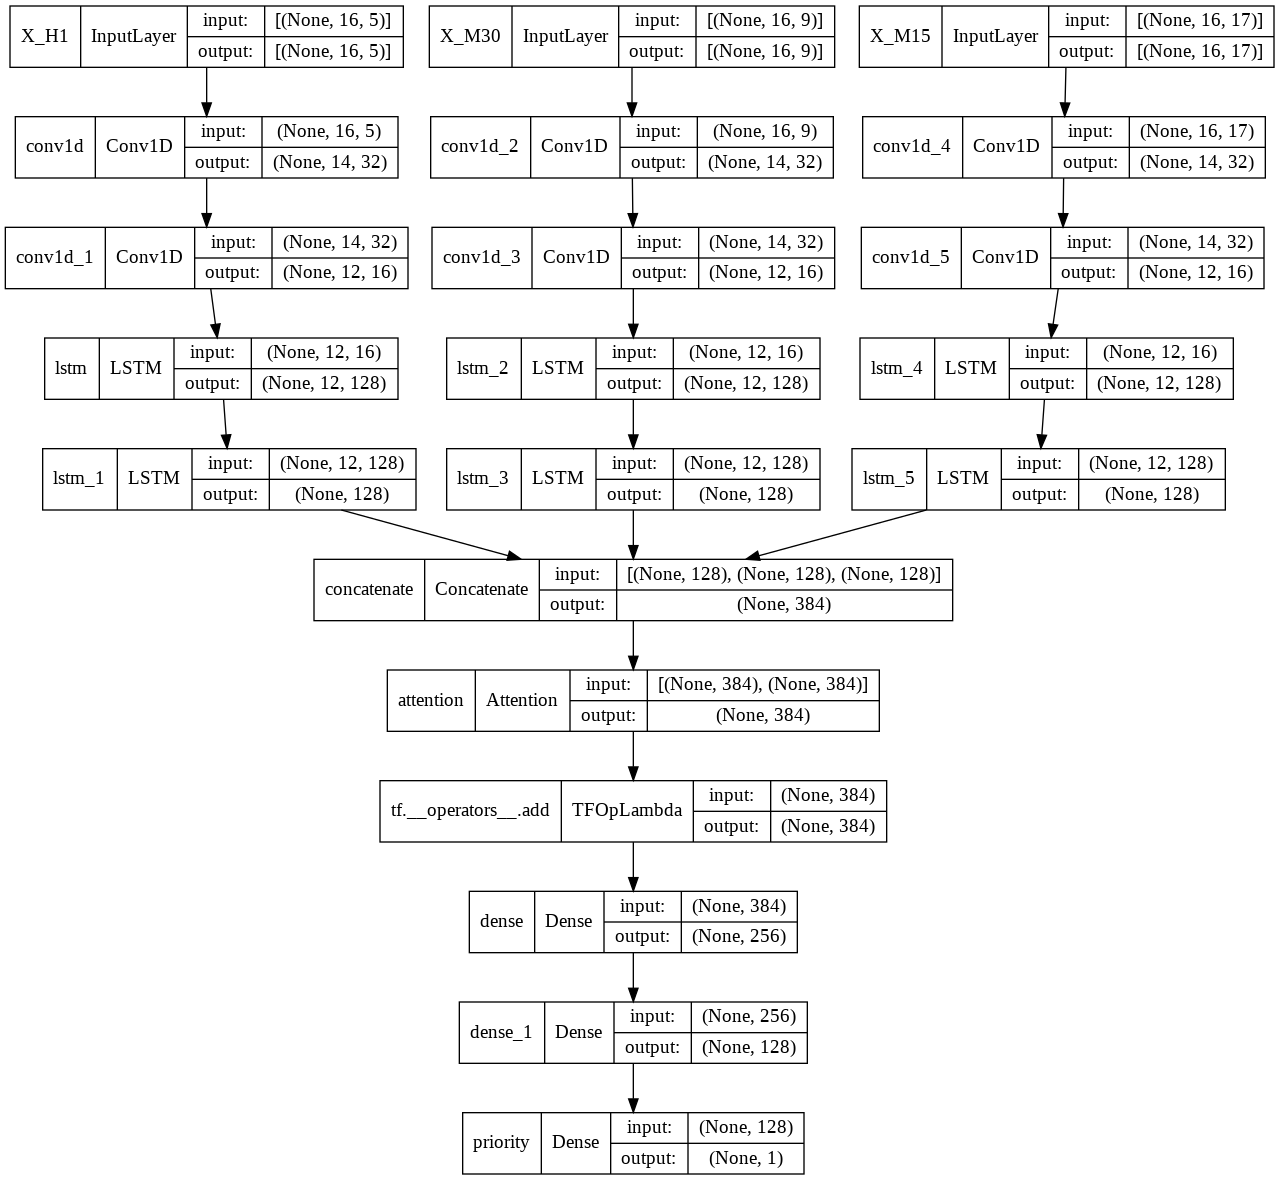

In [ ]:
from keras.layers.embeddings import Embedding
model = keras.Model(inputs=[inp_H1, inp_M30, inp_M15], outputs=[out])
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss={"priority": 'mean_squared_error',}
)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback

best_model_path = os.path.join(r'/content/checkpoint/model_{epoch:03d}', 'best_model_keras')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=20, min_delta=1e-8)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, mode='min',
                        min_delta=1e-8, cooldown=1, min_lr=1e-5)
mcp = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='min') 

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
model.fit(
    {"X_H1": train_H1_X, "X_M30": train_m30_X, "X_M15": train_m15_X},{"priority": train_H1_y},
    epochs=100,
    batch_size=128,
    validation_data=({"X_H1": valid_H1_X, "X_M30": valid_m30_X, "X_M15": valid_m15_X}, {"priority": valid_H1_y}),
    callbacks=[mcp, rlp, es]
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
110/110 [==============================] - ETA: 0s - loss: 0.1830
Epoch 00001: val_loss improved from inf to 0.00002, saving model to /content/checkpoint/model_001/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_001/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_001/best_model_keras/assets


110/110 [==============================] - 114s 1s/step - loss: 0.1830 - val_loss: 1.5736e-05 - lr: 0.0010
Epoch 2/100
110/110 [==============================] - ETA: 0s - loss: 5.3309e-06
Epoch 00002: val_loss improved from 0.00002 to 0.00000, saving model to /content/checkpoint/model_002/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_002/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_002/best_model_keras/assets


110/110 [==============================] - 115s 1s/step - loss: 5.3309e-06 - val_loss: 3.6133e-06 - lr: 0.0010
Epoch 3/100
110/110 [==============================] - ETA: 0s - loss: 4.6861e-06
Epoch 00003: val_loss did not improve from 0.00000
110/110 [==============================] - 56s 508ms/step - loss: 4.6861e-06 - val_loss: 3.6326e-06 - lr: 0.0010
Epoch 4/100
110/110 [==============================] - ETA: 0s - loss: 4.6510e-06
Epoch 00004: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_004/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_004/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_004/best_model_keras/assets


110/110 [==============================] - 112s 1s/step - loss: 4.6510e-06 - val_loss: 3.5745e-06 - lr: 0.0010
Epoch 5/100
110/110 [==============================] - ETA: 0s - loss: 4.7385e-06
Epoch 00005: val_loss did not improve from 0.00000
110/110 [==============================] - 54s 490ms/step - loss: 4.7385e-06 - val_loss: 3.6228e-06 - lr: 0.0010
Epoch 6/100
110/110 [==============================] - ETA: 0s - loss: 4.7027e-06
Epoch 00006: val_loss did not improve from 0.00000
110/110 [==============================] - 55s 498ms/step - loss: 4.7027e-06 - val_loss: 4.0425e-06 - lr: 0.0010
Epoch 7/100
110/110 [==============================] - ETA: 0s - loss: 4.7438e-06
Epoch 00007: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_007/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_007/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_007/best_model_keras/assets


110/110 [==============================] - 115s 1s/step - loss: 4.7438e-06 - val_loss: 3.5589e-06 - lr: 0.0010
Epoch 8/100
110/110 [==============================] - ETA: 0s - loss: 4.7431e-06
Epoch 00008: val_loss did not improve from 0.00000
110/110 [==============================] - 57s 515ms/step - loss: 4.7431e-06 - val_loss: 4.3255e-06 - lr: 0.0010
Epoch 9/100
110/110 [==============================] - ETA: 0s - loss: 4.7424e-06
Epoch 00009: val_loss did not improve from 0.00000
110/110 [==============================] - 56s 506ms/step - loss: 4.7424e-06 - val_loss: 3.5613e-06 - lr: 0.0010
Epoch 10/100
110/110 [==============================] - ETA: 0s - loss: 4.7301e-06
Epoch 00010: val_loss did not improve from 0.00000
110/110 [==============================] - 56s 505ms/step - loss: 4.7301e-06 - val_loss: 3.6417e-06 - lr: 0.0010
Epoch 11/100
110/110 [==============================] - ETA: 0s - loss: 4.7325e-06
Epoch 00011: val_loss did not improve from 0.00000

Epoch 00011: Re

INFO:tensorflow:Assets written to: /content/checkpoint/model_012/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_012/best_model_keras/assets


110/110 [==============================] - 114s 1s/step - loss: 4.7365e-06 - val_loss: 3.5552e-06 - lr: 5.0000e-04
Epoch 13/100
110/110 [==============================] - ETA: 0s - loss: 4.6892e-06
Epoch 00013: val_loss did not improve from 0.00000
110/110 [==============================] - 56s 508ms/step - loss: 4.6892e-06 - val_loss: 3.7119e-06 - lr: 5.0000e-04
Epoch 14/100
110/110 [==============================] - ETA: 0s - loss: 4.7487e-06
Epoch 00014: val_loss did not improve from 0.00000
110/110 [==============================] - 58s 526ms/step - loss: 4.7487e-06 - val_loss: 3.7791e-06 - lr: 5.0000e-04
Epoch 15/100
110/110 [==============================] - ETA: 0s - loss: 4.7507e-06
Epoch 00015: val_loss did not improve from 0.00000

Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
110/110 [==============================] - 56s 506ms/step - loss: 4.7507e-06 - val_loss: 3.7903e-06 - lr: 5.0000e-04
Epoch 16/100
110/110 [=============================

INFO:tensorflow:Assets written to: /content/checkpoint/model_020/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_020/best_model_keras/assets


110/110 [==============================] - 115s 1s/step - loss: 4.6517e-06 - val_loss: 3.5550e-06 - lr: 1.2500e-04
Epoch 21/100
110/110 [==============================] - ETA: 0s - loss: 4.6495e-06
Epoch 00021: val_loss did not improve from 0.00000
110/110 [==============================] - 64s 577ms/step - loss: 4.6495e-06 - val_loss: 3.6637e-06 - lr: 1.2500e-04
Epoch 22/100
110/110 [==============================] - ETA: 0s - loss: 4.6804e-06
Epoch 00022: val_loss did not improve from 0.00000
110/110 [==============================] - 63s 569ms/step - loss: 4.6804e-06 - val_loss: 3.5815e-06 - lr: 1.2500e-04
Epoch 23/100
110/110 [==============================] - ETA: 0s - loss: 4.6469e-06
Epoch 00023: val_loss did not improve from 0.00000

Epoch 00023: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
110/110 [==============================] - 62s 563ms/step - loss: 4.6469e-06 - val_loss: 3.6651e-06 - lr: 1.2500e-04
Epoch 24/100
110/110 [==============================

INFO:tensorflow:Assets written to: /content/checkpoint/model_027/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_027/best_model_keras/assets



Epoch 00027: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
110/110 [==============================] - 125s 1s/step - loss: 4.6395e-06 - val_loss: 3.5509e-06 - lr: 6.2500e-05
Epoch 00027: early stopping


# Load model to evaluate

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Downloading files
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd

In [89]:
gdd.download_file_from_google_drive(file_id='1rk6xmOGRs6Tcnx2JTWFw6V1Kl0ZPDFgV',dest_path='./model.zip',unzip=True)
model_load = load_model(r'/content/model')
prd_price = model_load.predict({"X_H1": test_H1_X, "X_M30": test_m30_X, "X_M15": test_m15_X})

Unzipping...Done.


In [90]:
predict_price_inver = prd_price * max_y_rows[int(H1_X.shape[0] * 0.85) + 1:, np.newaxis]
real_price = test_H1_y * max_y_rows[int(H1_X.shape[0] * 0.85) + 1:, np.newaxis]

print('Mean_squared_error = ', mean_squared_error(real_price, predict_price_inver))    # The smaller the better
print('Root mean_squared_error = ', math.sqrt(mean_squared_error(real_price, predict_price_inver)))    # The smaller the better
print('Explained_variance_score = ', explained_variance_score(real_price, predict_price_inver))   # The closer to 1, the better
print('R2_score = ', r2_score(real_price, predict_price_inver, multioutput='variance_weighted'))   # The closer to 1, the better

Mean_squared_error =  1.964782279696438e-06
Root mean_squared_error =  0.0014017069164759222
Explained_variance_score =  0.9900719574039789
R2_score =  0.9900664144216916


# Evaluate if you have trained the model

In [ ]:
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model = load_model('checkpoint/model_027/best_model_keras')
prd_price = model.predict({"X_H1": test_H1_X, "X_M30": test_m30_X, "X_M15": test_m15_X})

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
predict_price_inver = prd_price * max_y_rows[int(H1_X.shape[0] * 0.85) + 1:, np.newaxis]

In [ ]:
real_price = test_H1_y * max_y_rows[int(H1_X.shape[0] * 0.85) + 1:, np.newaxis]

In [ ]:
print('Mean_squared_error = ', mean_squared_error(real_price, predict_price_inver))    # The smaller the better
print('Root mean_squared_error = ', math.sqrt(mean_squared_error(real_price, predict_price_inver)))    # The smaller the better
print('Explained_variance_score = ', explained_variance_score(real_price, predict_price_inver))   # The closer to 1, the better
print('R2_score = ', r2_score(real_price, predict_price_inver, multioutput='variance_weighted'))   # The closer to 1, the better

Mean_squared_error =  1.964782279696438e-06
Root mean_squared_error =  0.0014017069164759222
Explained_variance_score =  0.9900719574039789
R2_score =  0.9900664144216916
